In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
stocks =['AMZN','NFLX','FB','GOOG','AAPL','BABA']
#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01-01-2017', end='03-01-2020')['Adj Close']
print(data)

Symbols            AMZN        NFLX          FB         GOOG        AAPL  \
Date                                                                       
2017-01-03   753.669983  127.489998  116.860001   786.140015  110.691154   
2017-01-04   757.179993  129.410004  118.690002   786.900024  110.567276   
2017-01-05   780.450012  131.809998  120.669998   794.020020  111.129562   
2017-01-06   795.989990  131.070007  123.410004   806.150024  112.368469   
2017-01-09   796.919983  130.949997  124.900002   806.650024  113.397697   
...                 ...         ...         ...          ...         ...   
2020-02-24  2009.290039  368.700012  200.720001  1421.589966  298.179993   
2020-02-25  1972.739990  360.089996  196.770004  1388.449951  288.079987   
2020-02-26  1979.589966  379.239990  197.199997  1393.180054  292.649994   
2020-02-27  1884.300049  371.709991  189.750000  1318.089966  273.519989   
2020-02-28  1883.750000  369.029999  192.470001  1339.329956  273.359985   

Symbols    

Text(0, 0.5, 'price in $')

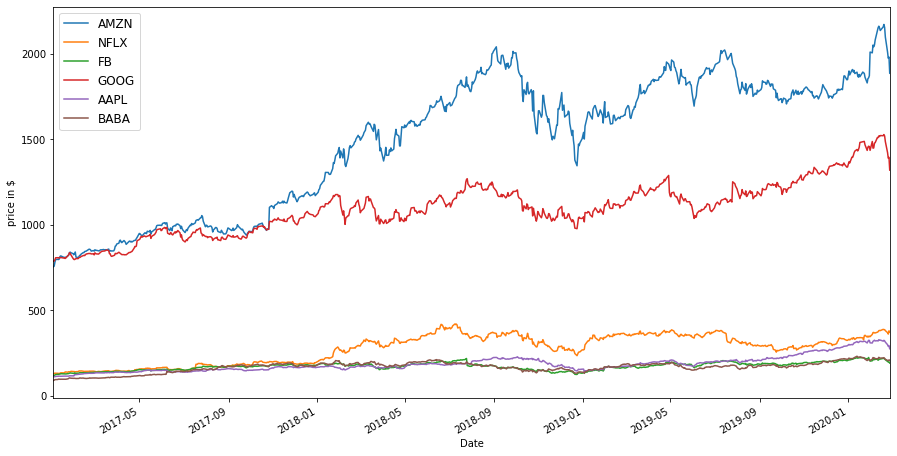

In [3]:
data.plot(figsize=(15,8))
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

In [4]:
weights= np.array([0.19 , 0.26, 0.015  , 0.08, 0.23, 0.22])

In [5]:
#daily returns
returns = data.pct_change()[1:]
returns

Symbols,AMZN,NFLX,FB,GOOG,AAPL,BABA
Date,,,,,,
2017-01-04,0.004657,0.015060,0.015660,0.000967,-0.001119,0.021558
2017-01-05,0.030732,0.018546,0.016682,0.009048,0.005085,0.042647
2017-01-06,0.019912,-0.005614,0.022707,0.015277,0.011148,-0.005086
2017-01-09,0.001168,-0.000916,0.012074,0.000620,0.009159,0.008840
2017-01-10,-0.001280,-0.008095,-0.004404,-0.002306,0.001009,0.021432
...,...,...,...,...,...,...
2020-02-24,-0.041356,-0.029916,-0.045009,-0.042771,-0.047500,-0.030246
2020-02-25,-0.018191,-0.023352,-0.019679,-0.023312,-0.033872,-0.002668
2020-02-26,0.003472,0.053181,0.002185,0.003407,0.015864,0.015223


Text(0, 0.5, 'daily returns')

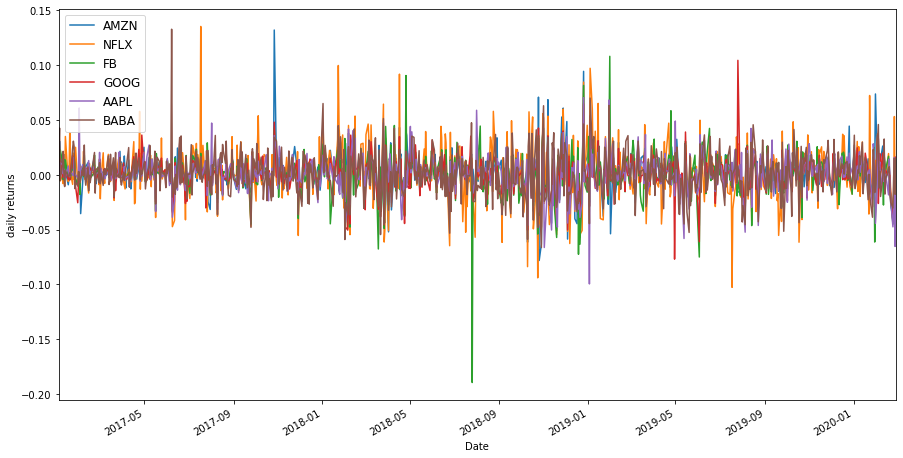

In [6]:
returns.plot(figsize=(15,8))
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('daily returns')

In [7]:
#annualized covariance
covar_annual= returns.cov()*252
covar_annual

Symbols,AMZN,NFLX,FB,GOOG,AAPL,BABA
Symbols,,,,,,
AMZN,0.076407,0.061139,0.046358,0.043504,0.040654,0.047783
NFLX,0.061139,0.136825,0.049121,0.047130,0.042184,0.054882
FB,0.046358,0.049121,0.084645,0.041630,0.035536,0.046219
GOOG,0.043504,0.047130,0.041630,0.054771,0.036072,0.040729
AAPL,0.040654,0.042184,0.035536,0.036072,0.063541,0.042165
BABA,0.047783,0.054882,0.046219,0.040729,0.042165,0.097629


In [8]:
#portfolio variance
port_var=np.dot(weights.T,np.dot(covar_annual,weights))
#portfolio volatility/ sd(risk)
port_volatility = np.sqrt(port_var)
#annual portfolio return
port_return=np.sum(returns.mean()*weights)*252

In [9]:
#expected annual return, volatility(risk), variance
percent_var = str( round(port_var, 2) * 100 ) + '%'
percent_vols = str( round(port_volatility, 2) * 100 ) + '%'
percent_ret = str( round(port_return, 2) * 100 ) + '%'

print('Expected annual return: ' + percent_ret)
print('Expected annual volatility: ' + percent_vols)
print('Expected annual variance: ' + percent_var)

Expected annual return: 33.0%
Expected annual volatility: 24.0%
Expected annual variance: 6.0%


In [10]:
benchmark_price = web.get_data_yahoo('SPY',
                               start = '2017-01-01',
                               end = '2020-03-01')
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]
benchmark_ret

Date
2017-01-04    0.005949
2017-01-05   -0.000794
2017-01-06    0.003578
2017-01-09   -0.003301
2017-01-10    0.000000
                ...   
2020-02-24   -0.033165
2020-02-25   -0.030302
2020-02-26   -0.003678
2020-02-27   -0.044912
2020-02-28   -0.004201
Name: Adj Close, Length: 793, dtype: float64

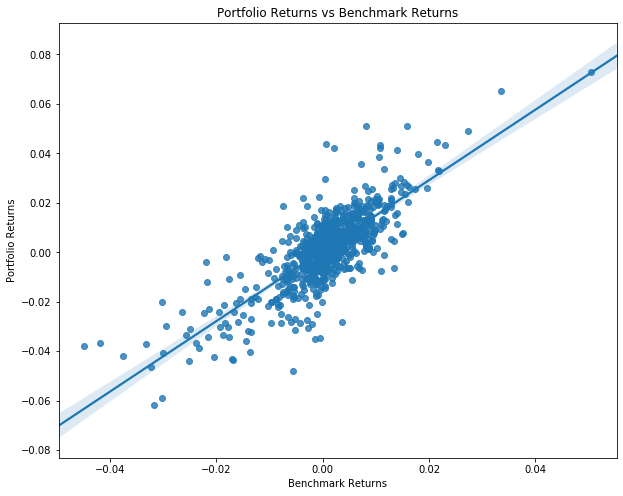

In [11]:
port_ret = (returns * weights).sum(axis = 1)
plt.figure(figsize=(10,8))
sns.regplot(benchmark_ret,
port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

In [12]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha,5))

The portfolio beta is 1.4249
The portfolio alpha is 0.00067


In [13]:
#set number of runs of random portfolio weights
num_portfolios = 25000
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))


In [14]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(6))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    mean_daily_returns = returns.mean()
    cov_matrix = returns.cov()
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5]])


In [16]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
print("The portfolio for max Sharpe Ratio:\n", max_sharpe_port)


The portfolio for max Sharpe Ratio:
 ret       0.338876
stdev     0.236886
sharpe    1.430542
AMZN      0.113685
NFLX      0.240541
FB        0.020633
GOOG      0.000500
AAPL      0.528229
BABA      0.096412
Name: 3076, dtype: float64


In [17]:
#Spot the position of the portfolio with minimum Standard Deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
print("The portfolio for min risk:\n", min_vol_port)


The portfolio for min risk:
 ret       0.260900
stdev     0.213652
sharpe    1.221145
AMZN      0.115181
NFLX      0.001079
FB        0.116085
GOOG      0.375571
AAPL      0.339894
BABA      0.052189
Name: 10764, dtype: float64


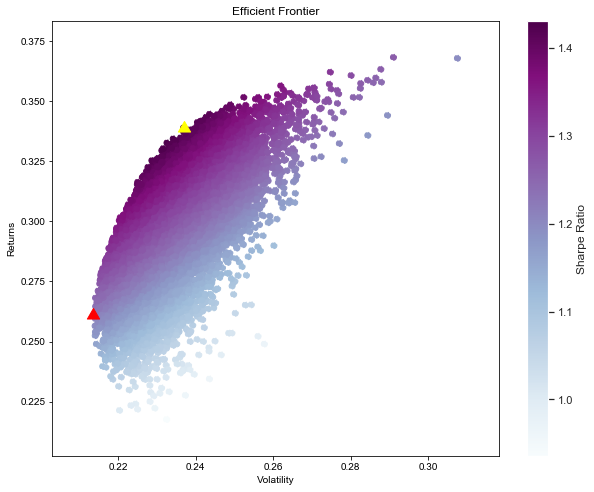

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='BuPu', linestyle='-.')
plt.xlabel('Volatility')
sns.set(style='darkgrid')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(3,1,0),color='yellow',s=200)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(3,1,0),color='red',s=200)

In [19]:
DailyReturns=returns.mean()*252
DailyReturns

Symbols
AMZN    0.329246
NFLX    0.406049
FB      0.201715
GOOG    0.196751
AAPL    0.319319
BABA    0.319879
dtype: float64

In [20]:
stockrisk=np.std(returns)*np.sqrt(252)
stockrisk

Symbols
AMZN    0.276244
NFLX    0.369665
FB      0.290755
GOOG    0.233885
AAPL    0.251915
BABA    0.312259
dtype: float64